# shear2D verification case

A circle of radius $R=0.15$ is placed in a unit-square domain at $C=(0.75, 0.5)$ and advected with the velocity 

$$
        \mathbf{v} = \cos \left(\frac{\pi t}{T}\right) \left[ \begin{matrix} 
            \sin(2\pi y)\sin^2(\pi x) \\ 
            -\sin(2\pi x)\sin^2(\pi y) \\ 
            0
        \end{matrix}\right]
$$

that reverses the flow after $t=0.5T$. Rate of convergence is reported for the absolute error $|\phi_c^{T} - \phi_c^{0}|$ in the $L_\infty$ norm
$$
             e_\phi^\infty = \max_{c \in C} |\phi^{t_e}_c - \phi^0_c|,
$$
with $t_e = T$ and $C$ being the index-set of all mesh cells. The rate of convergence is computed with respect to the discretization length $h$
$$
                h := \max_{f \in F} \| \mathbf{d}_f \|, 
$$
where $F$ is the index-set of all mesh faces.

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import os

# Find all "leiaLevelSetFoam.csv" files in parameter study folders
csv_filename = "leiaLevelSetFoam.csv"
study_pattern = "convergence"
shear_2D_files = [os.path.join(folder, csv_filename) 
                  for folder in os.listdir(os.curdir) 
                  if os.path.isfile(os.path.join(folder, csv_filename))
                  and study_pattern in folder]
shear_2D_files.sort()

# Read all "leiaLevelSetFoam.csv" files as pandas.DataFrame
shear_2D_dframes = []
for shear_2D_file in shear_2D_files:
    shear_2D_dframes.append(pd.read_csv(shear_2D_file, header=0))
   
shear_2D_dframe = pd.concat(shear_2D_dframes, ignore_index=True)
shear_2D_dframe.to_csv("shear-2D.csv") 

# Convergence of $|V(t_0) - V_e| \quad V(t_0) := \sum_{c \in C} \alpha_c |\Omega_c|$ $V_e$ is the exact volume

Exact volume 7.068583e-03
Marker model volume
0    0.006371
1    0.006306
2    0.006289
Name: VOL_ALPHA_0, dtype: float64
Volume error
0    0.000697
1    0.000762
2    0.000780
Name: VOL_ALPHA_0, dtype: float64


Text(0.5, 0, 'h')

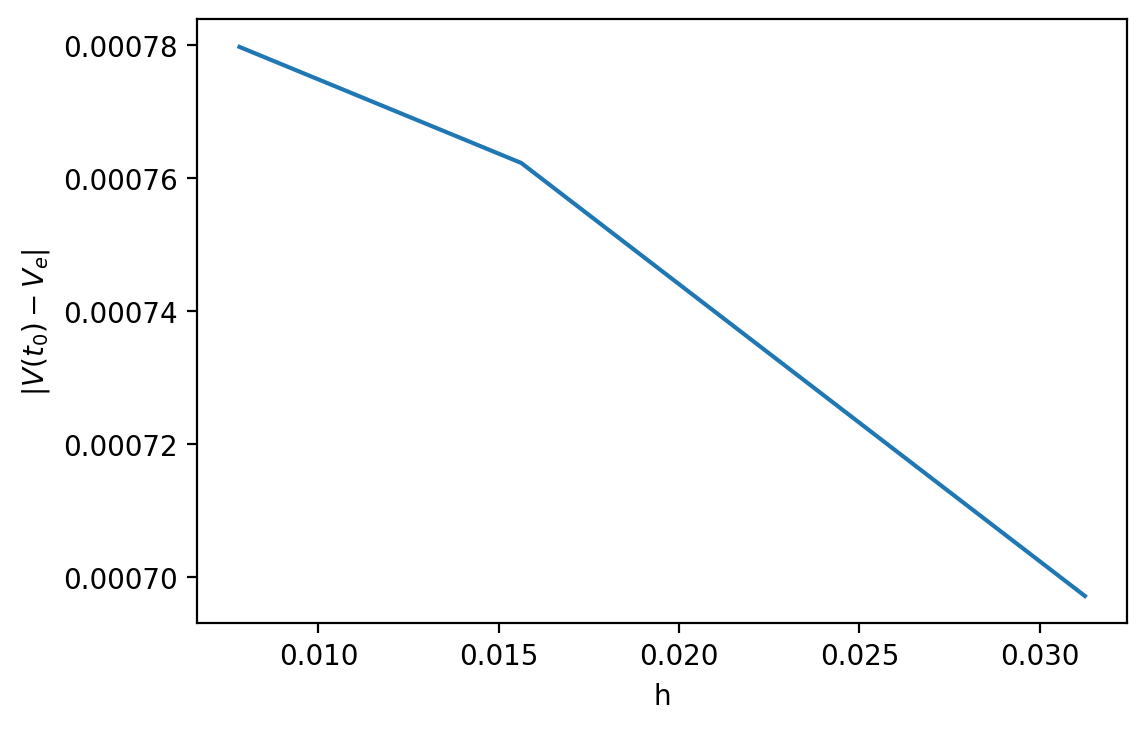

In [24]:
from math import pi
R = 0.15 # From the test case definition 
A = R**2 * pi
mesh_h = 0.1 # From system/blockMeshDict
V_e = A * mesh_h 

print ("Exact volume %e" % V_e)
print ("Marker model volume")
print (shear_2D_dframe["VOL_ALPHA_0"])
volume_error = abs(shear_2D_dframe["VOL_ALPHA_0"] - V_e)
print ("Volume error")
print (volume_error)
plt.plot(shear_2D_dframe["H"], volume_error)
plt.ylabel("$|V(t_0) - V_e|$")
plt.xlabel("h")

# Convergence of $\max_{c \in C} |\phi^e_c(t_0) - \phi_c(T)|$ 

[]

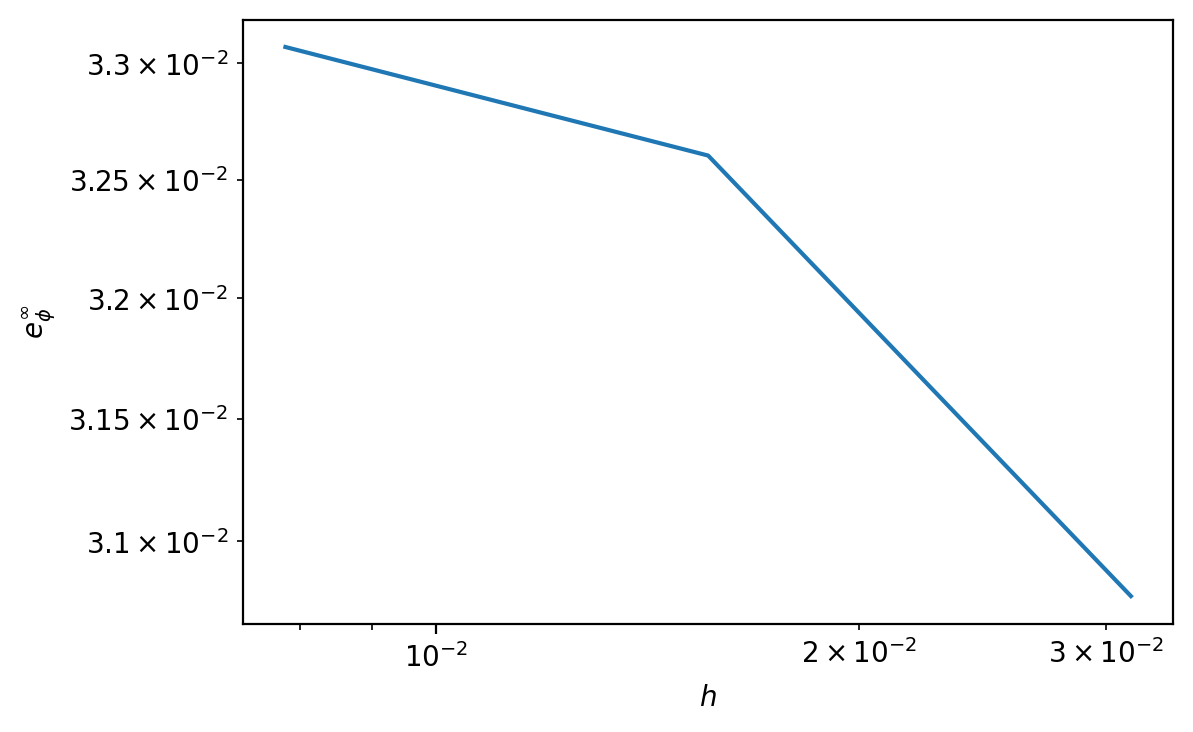

In [10]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 200
plt.plot(shear_2D_dframe["H"], shear_2D_dframe["L_INF_E_PHI"])
plt.xlabel("$h$")
plt.ylabel("$e_\phi^\infty$")
plt.loglog()